In [1]:
#Images that this notebook will be using (assuming they are in the same directory as the script)
#Replace PATH_1 and PATH_2 with the string of your image's name as well as the extension.
#This code runs assuming that the images are stored in the same directory as the jupyter notebook.
PATH_1 = "Image_1.jpg"
PATH_2 = "Image_2.jpg"

In [2]:
#Importing OpenCV and Numpy and displaying the version used of each libraries
#The version used for this notebook at the moment of testing were:
    #numpy version 1.23.5
    #cv2 version 4.7.0
    #matplotlib version 3.7.0

import numpy as np
import cv2
#This import statement only used to display the version of matplotlib used in this notebook
import matplotlib
#Import pyplot to plot images in the assignment
import matplotlib.pyplot as plt

if hasattr(np, '__version__'):
    print(f"The version of {np.__name__} is {np.__version__}")
else:
    print(f"{np.__name__} does not have a version attribute.")
    

if hasattr(cv2, '__version__'):
    print(f"The version of {cv2.__name__} is {cv2.__version__}")
else:
    print(f"{cv2.__name__} does not have a version attribute.")

    
if hasattr(matplotlib, '__version__'):
    print(f"The version of {matplotlib.__name__} is {matplotlib.__version__}")
else:
    print(f"{matplotlib.__name__} does not have a version attribute.")
    

The version of numpy is 1.23.5
The version of cv2 is 4.7.0
The version of matplotlib is 3.7.0


In [3]:
#Image Class to manipulate images

"""
Given a Path to an Image and a title, the Image Object instantiates
all of the required pre-processing that this assignment will use

-GrayScaled
-Gaussian Smoothing (5x5) and (11x11) kernels
-x,y Derivatives Using Sobel Filters
-Gradient Magnitude/Orientation
-Canny Edge Detection
"""
    
class Image:
    
    def __init__(self, path, title):
        #Image defined by cv2 image read 
        self.image = cv2.imread(path)
        #Convert BGR image (default format of my ipad camera) to RGB
        self.image_RGB = cv2.cvtColor(self.image, cv2.COLOR_BGR2RGB)        
        #Gray Scale The Image
        self.image_grayscaled = cv2.cvtColor(self.image_RGB, cv2.COLOR_RGB2GRAY)
        #Gaussian Smoothing with a 5x5 kernel on the grayscaled image
        self.gray_gaussian_5 = cv2.GaussianBlur(self.image_grayscaled, (5,5), sigmaX=2)
        #Gaussian Smoothing with a 11x11 kernel on the grayscaled image
        self.gray_gaussian_11 = cv2.GaussianBlur(self.image_grayscaled, (11,11), sigmaX=2)
        #Get x,y derivatives of the image using Sobel Filter for the 5x5 kernel smoothed image
        self.dx_5 = cv2.Sobel(self.gray_gaussian_5, cv2.CV_64F, 1, 0, ksize=3)
        self.dy_5 = cv2.Sobel(self.gray_gaussian_5, cv2.CV_64F, 0, 1, ksize=3)
        #Get x,y derivatives of the image using Sobel Filter for the 11x11 kernel smoothed image
        self.dx_11 = cv2.Sobel(self.gray_gaussian_11, cv2.CV_64F, 1, 0, ksize=3)
        self.dy_11 = cv2.Sobel(self.gray_gaussian_11, cv2.CV_64F, 0, 1, ksize=3)
        # Calculate the edge gradient magnitude and orientation of the 5x5 kernel smoothed images
        #using the Sobel Filter Values
        self.gradient_magnitude_5 = np.sqrt(self.dx_5**2 + self.dy_5**2)
        self.gradient_orientation_5 = np.arctan2(self.dy_5, self.dx_5)
        # Calculate the edge gradient magnitude and orientation of the 11x11 kernel smoothed images
        #using the Sobel Filter Values        
        self.gradient_magnitude_11 = np.sqrt(self.dx_11**2 + self.dy_11**2)
        self.gradient_orientation_11 = np.arctan2(self.dy_11, self.dx_11)
        #Canny Edge Detection Images on both the 5x5 and 11x11 kernel gaussian smoothed images
        self.canny_5 = cv2.Canny(self.gray_gaussian_5 , 50, 150)
        self.canny_11 = cv2.Canny(self.gray_gaussian_11, 50, 150)

        #Defining Titles for each of the images and their separate processing steps
        self.title = title
        self.gray_title = self.title + " GrayScaled"
        self.gaussian_5_title = self.gray_title + " with gaussian blur (5x5 kernel)"
        self.gaussian_11_title = self.gray_title + " with gaussian blur (11x11 kernel)"
        self.dx_5_title = self.gaussian_5_title + ' x derivative'
        self.dy_5_title = self.gaussian_5_title + ' y derivative'
        self.dx_11_title = self.gaussian_11_title + ' x derivative'
        self.dy_11_title = self.gaussian_11_title + ' y derivative'
        self.gradient_magnitude_5_title = self.gaussian_5_title + " Gradient Magnitude"
        self.gradient_orientation_5_title = self.gaussian_5_title + " Orientation"
        self.gradient_magnitude_11_title = self.gaussian_11_title + " Gradient Magnitude"
        self.gradient_orientation_11_title = self.gaussian_11_title + " Orientation"
        self.canny_5_title = self.gaussian_5_title + " Canny Detection"
        self.canny_11_title = self.gaussian_11_title + " Canny Detection"
        
    #Display Appropriate Image/Title based on Image_index
    def display(self, image_index = 0, cmap = 'gray'):
        images = [self.image_RGB, self.image_grayscaled, self.gray_gaussian_5, self.gray_gaussian_11,
                  self.dx_5,self.dy_5,self.dx_11,self.dy_11,self.gradient_magnitude_5,self.gradient_orientation_5,
                  self.gradient_magnitude_11, self.gradient_orientation_11, self.canny_5,  self.canny_11]
        
        
        titles = [self.title, self.gray_title, self.gaussian_5_title, self.gaussian_11_title,
                  self.dx_5_title, self.dy_5_title, self.dx_11_title, self.dy_11_title, self.gradient_magnitude_5_title,
                  self.gradient_orientation_5_title, self.gradient_magnitude_11_title,self.gradient_orientation_11_title,
                  self.canny_5_title, self.canny_11_title]
    
        #If displaying Orientations, set cmap to jet
        if image_index == 9 or image_index == 11:
            cmap = 'jet'
    
        #Display Image
        plt.imshow(images[image_index], cmap = cmap)
        plt.axis('off')  #Turn off axis labels
        plt.title(titles[image_index])
        plt.show()
        

In [4]:
#Image List class that inherits from Image Class

"""
This ImageList class takes a list of Image Objects (Defined Above)
For each pre-processing steps, this class will display each images and each of their
states as well as give each graphs the appropriate title that represents the 
processing used to reach said images
"""

class ImageList(Image):
    
    def __init__(self, list_of_images):
        #List of images self_contained
        self.list = list_of_images
        #Number of Image Modifications (Excluding Original One)
        self.number_of_images = 14
        
    #Display all images of the list with all of their different processings (grayscaled,Gaussian smoothed etc)
    def display(self):         
        for number_of_images in range(self.number_of_images):
            for image in self.list:
                image.display(image_index = number_of_images)
            

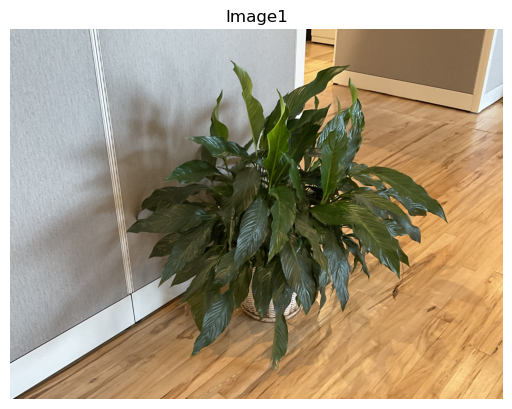

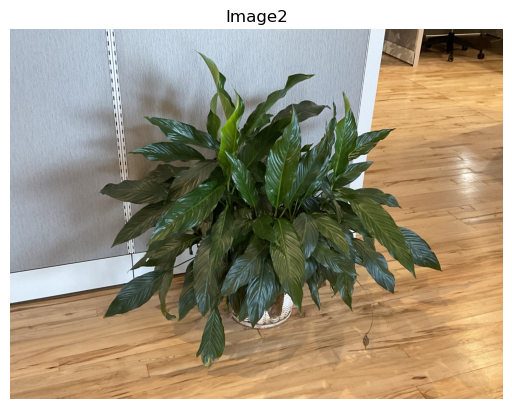

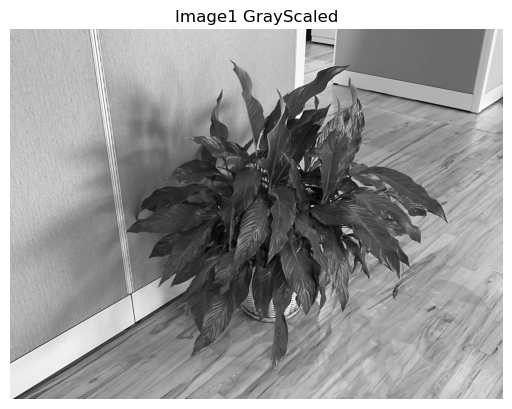

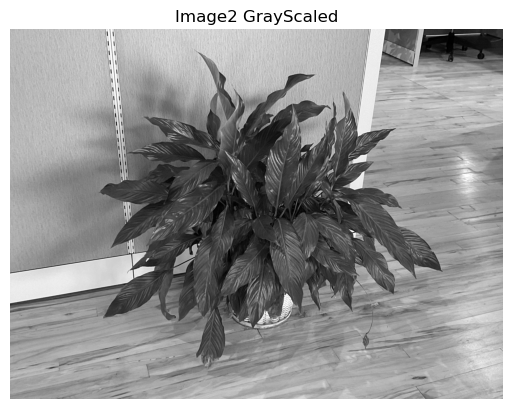

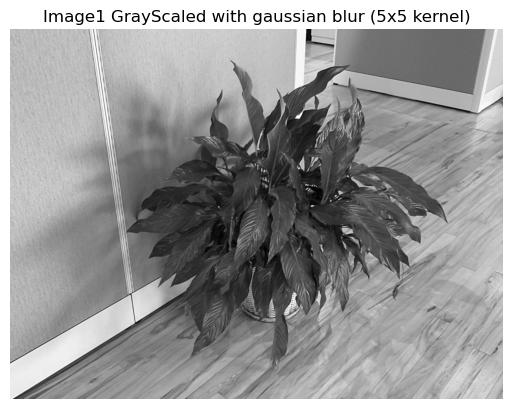

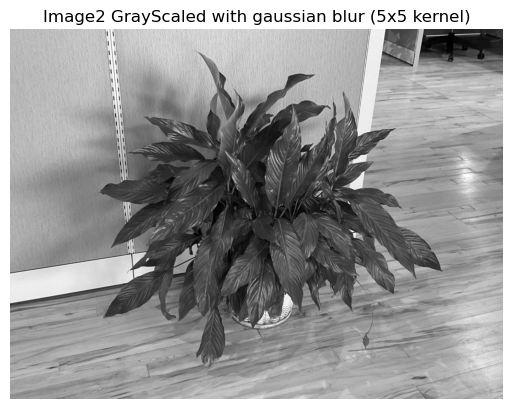

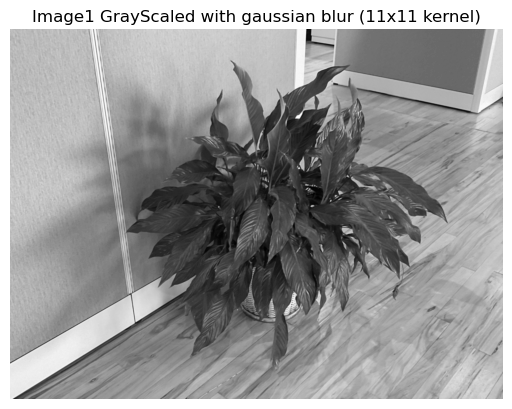

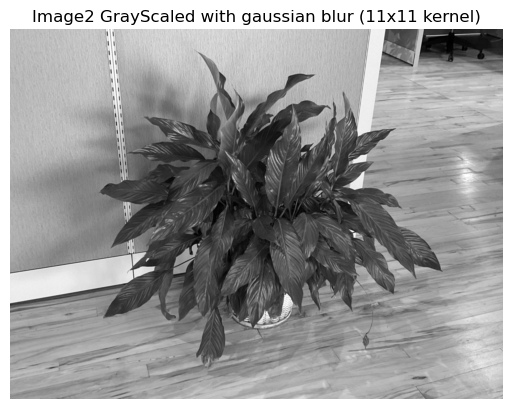

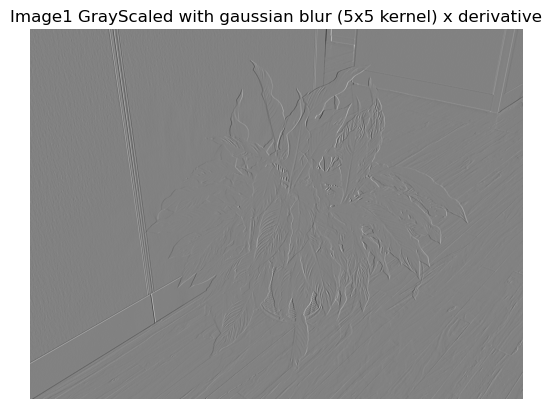

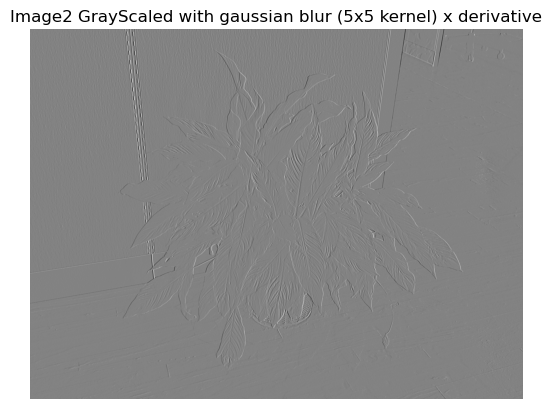

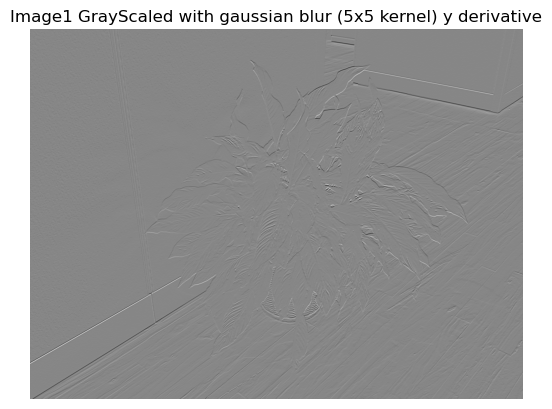

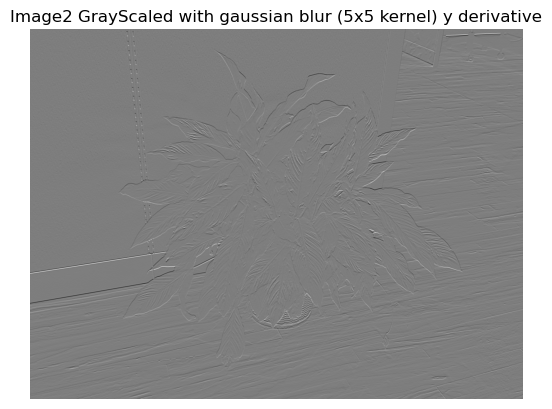

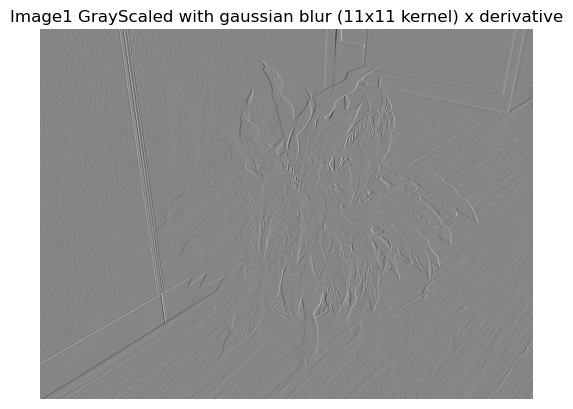

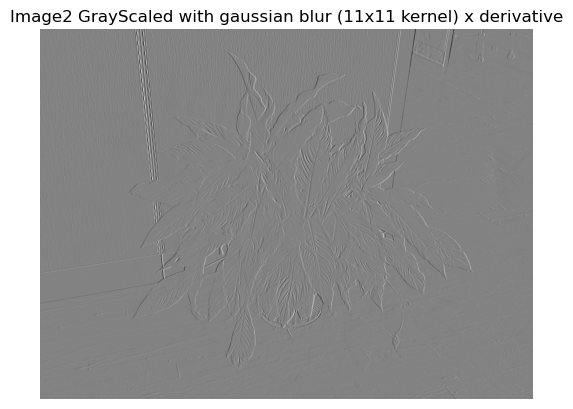

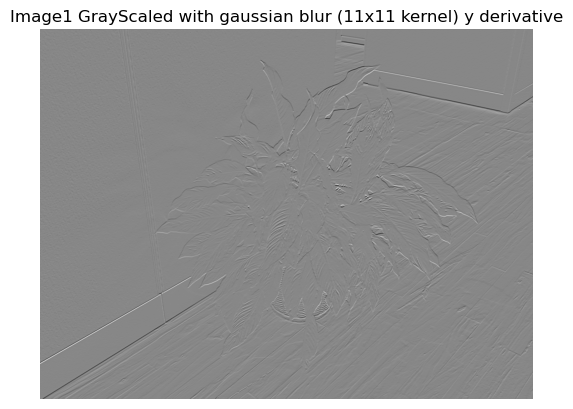

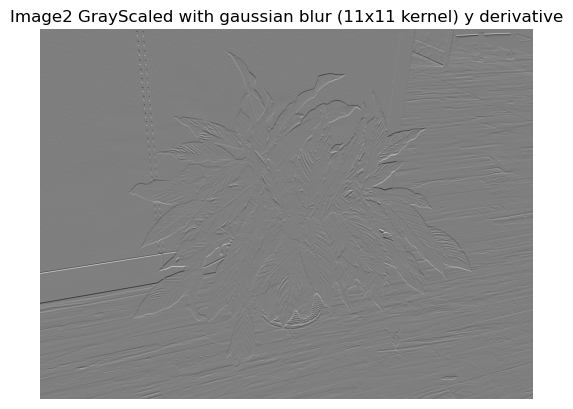

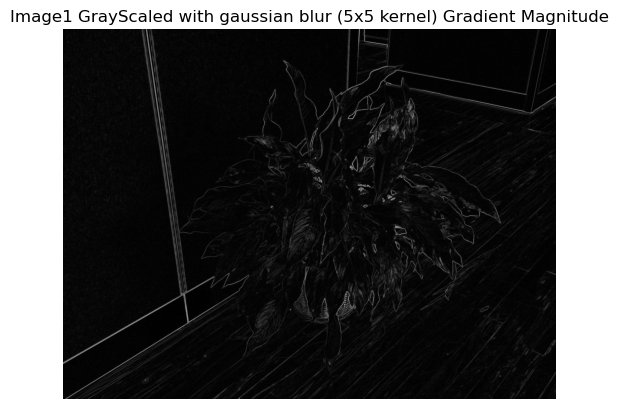

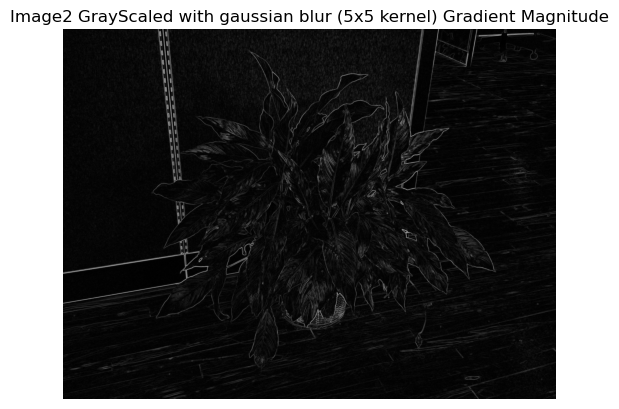

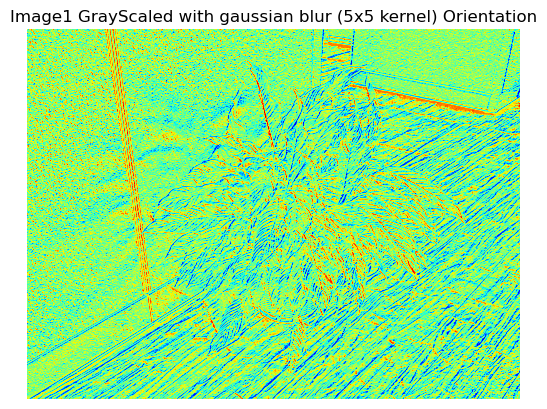

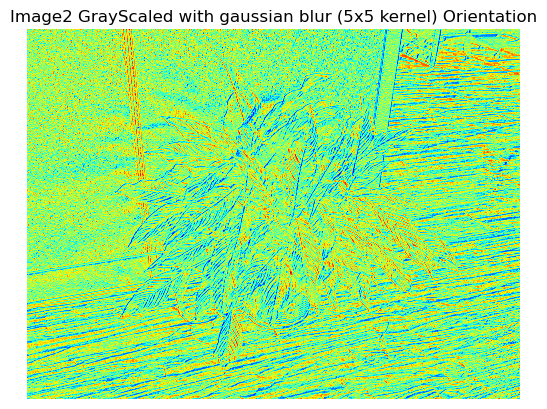

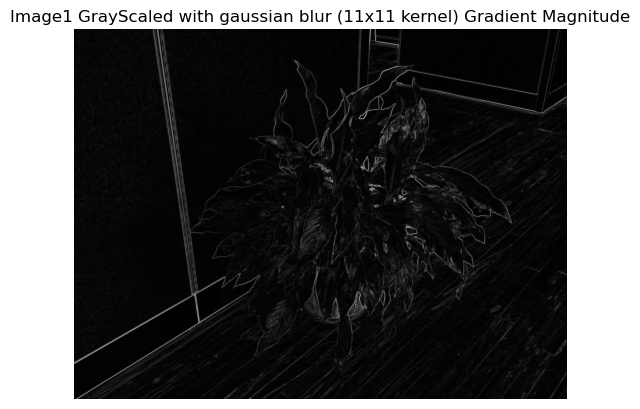

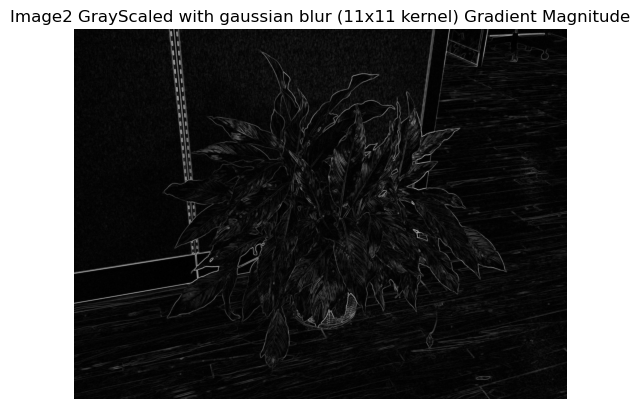

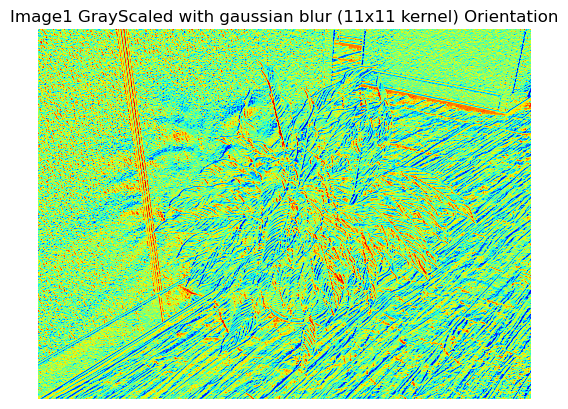

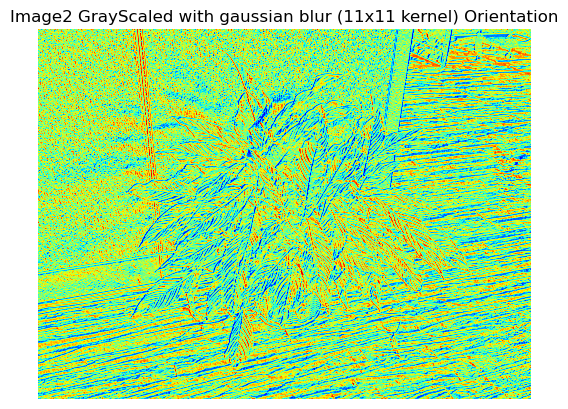

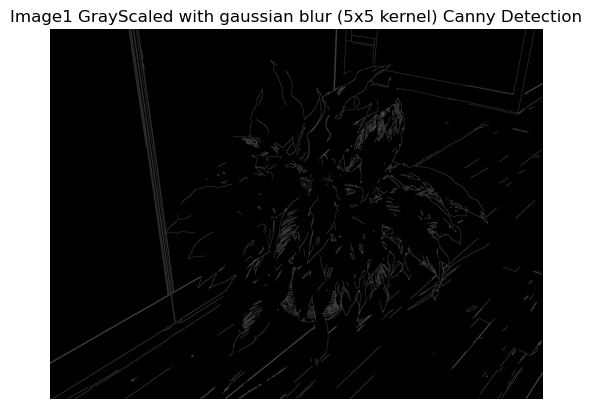

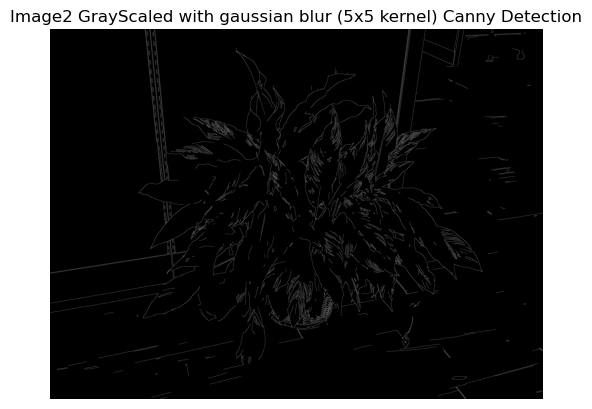

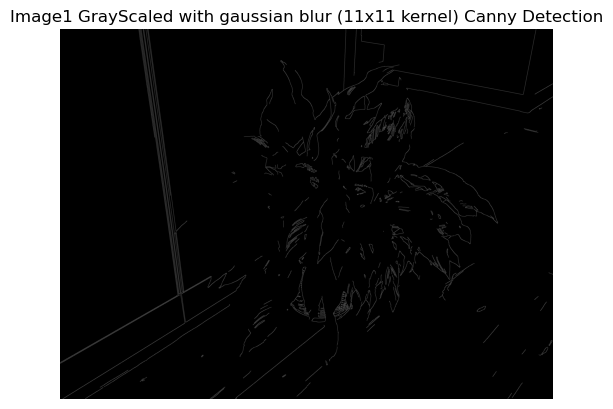

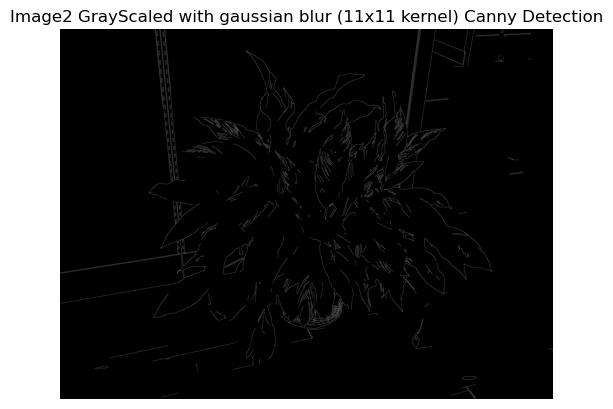

In [5]:
#Create Image Object for Both Images used in the script
Image1 = Image(PATH_1, title = 'Image1')
Image2 = Image(PATH_2, title = 'Image2')

#Image Object List Containing the two Image Objects
Images_List = ImageList(list_of_images = [Image1,Image2])

#Display All of the Images in Succession with all their different processed configurations (Gray, Gaussian Smooth etc)
Images_List.display()

#Scroll Down To see All Images as they are all being outputted in this cell



